# **Computational Methods**
## **3-D Graphics & 2-D Interpolation**

Written by Niv Keren, nivkeren1@mail.tau.ac.il 

*Computational Methods* class: 0341-2300

2020/Semester I; Tuesdays 14:00-16:00

FACULTY OF EXACT SCIENCES | GEOPHYSICS & PLANETARY SCIENCES  
Tel Aviv University

---
In order to plot continuous lines in the 3D space, we need to `import mplot3d` from the mpl toolkits (part of matplotlib).
The syntax is very similar that of 2D plot.

In [9]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6.67]

Will create a figure and an axes objects.

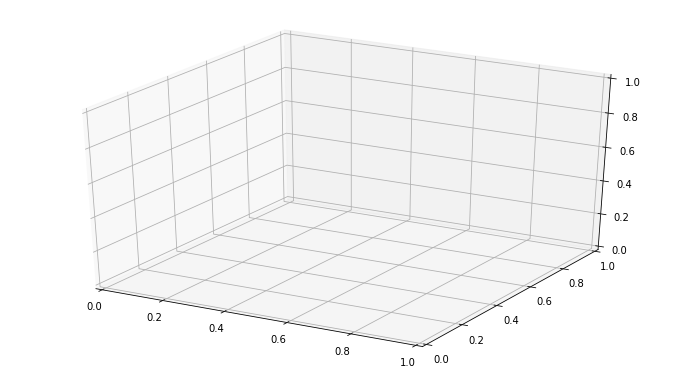

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')

The following lines produce a 3D spiral.

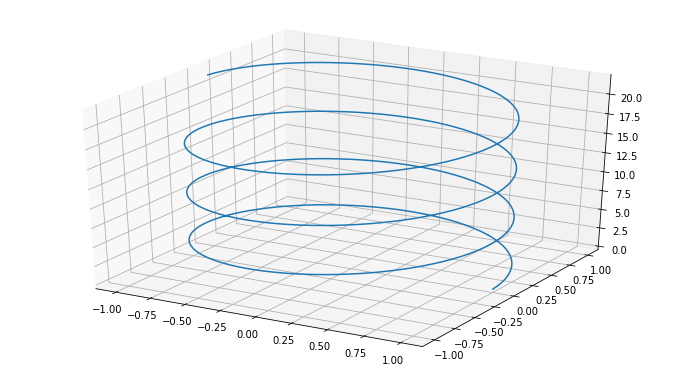

In [5]:
ax = plt.axes(projection='3d')
t = np.linspace(0, 7 * np.pi, 1000)
ax.plot3D(np.cos(t), np.sin(t), t)
plt.show()

As it turns out, a useful tool for 3D graphics is `np.meshgrid` -  
a function that transforms the domain defined by two vectors (x and y) into two arrays (X and Y).  
It simply replicates the vector x as rows and the vector y as columns.

In [44]:
x = np.arange(-2, 3)
y = np.arange(0, 4)
xx, yy = np.meshgrid(x, y)

We can now calculate a matrix that will give  
*z = x^2 + y^2*

In [45]:
z = xx**2 + yy**2

`plot_surface` plots z as a function of x and y, as tiles, or rectangles.  
The surfaces are white, opaque, and the mesh lines are coloured according to the value of Z.

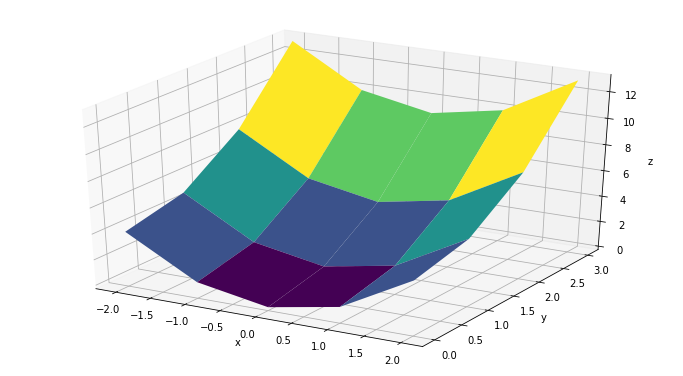

In [47]:
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, z, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()

For demonstartion purposes we will define the function `peaks()` .  
`peaks` is just a function used for example pueposes since it produces 
an example of a visually nice 3d function, for training purposes.

In [49]:
def peaks(xx, yy):
    """
    A function for 3D ploting exersice.
    Args:
        X (ndarray): x coordinates of shape (n, n)
        Y (ndarray): y coordinates of shape (n, n)

    Returns:
        ndarray: The z values of the function of shape (n, n)
    """
    return 3 * (1 - xx)**2 * np.exp(-(xx**2) - (yy+1)**2) \
           - 10 * (xx/5 - xx**3 - yy**5) * np.exp(-xx**2 - yy**2) \
           - 1/3 * np.exp(-(xx + 1)**2 - yy**2)

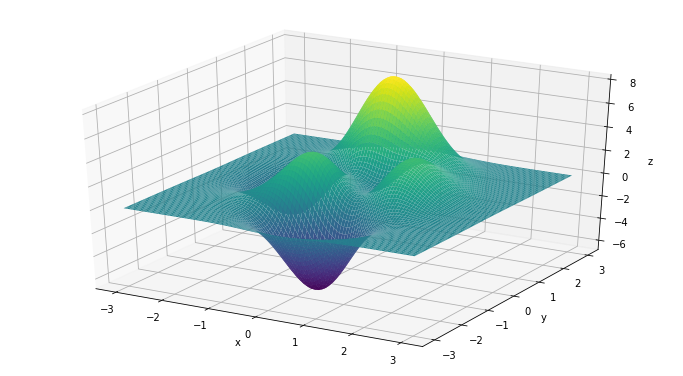

In [51]:
N = 100
ax = plt.axes(projection='3d')
x = np.linspace(-3, 3, N)
y = np.linspace(-3, 3, N)
xx, yy = np.meshgrid(x, y)
z = peaks(xx, yy)
ax.plot_surface(xx, yy, z, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()


The function `contour()` draws a contour plot (topographic map)

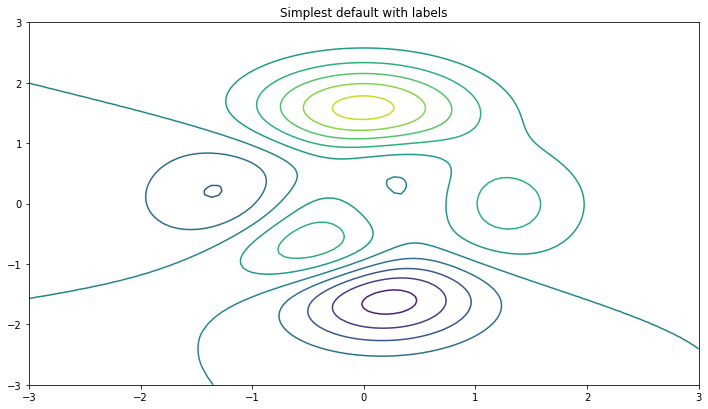

In [52]:
ax = plt.axes()
cs = ax.contour(xx, yy, z, 10)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Simplest default with labels')
plt.show()

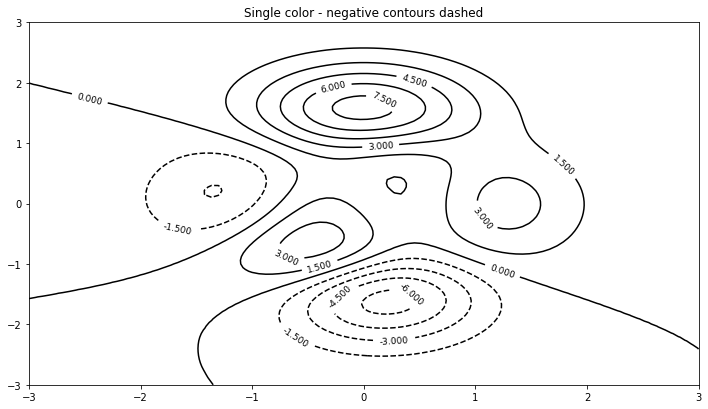

In [12]:
ax = plt.axes()
CS = ax.contour(X, Y, Z, 10, colors='k')  # negative contours will be dashed by default)
ax.clabel(CS, fontsize=9, inline=1)
ax.set_title('Single color - negative contours dashed')
plt.show()

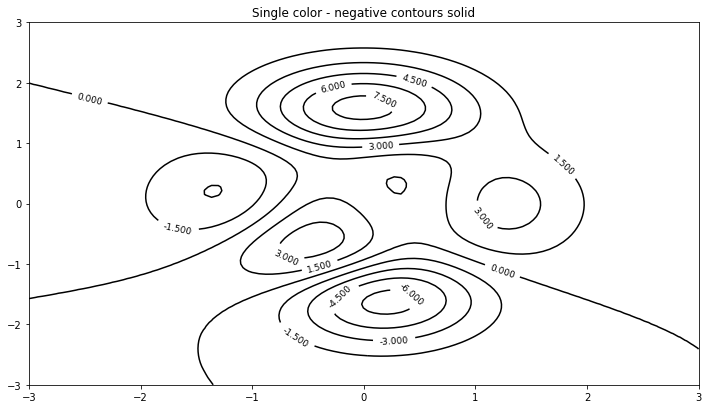

In [53]:
plt.rcParams['contour.negative_linestyle'] = 'solid'
ax = plt.axes()
cs = ax.contour(xx, yy, z, 10, colors='k')  # negative contours will be dashed by default)
ax.clabel(cs, fontsize=9, inline=1)
ax.set_title('Single color - negative contours solid')
plt.show()

We can specify the number of the levels

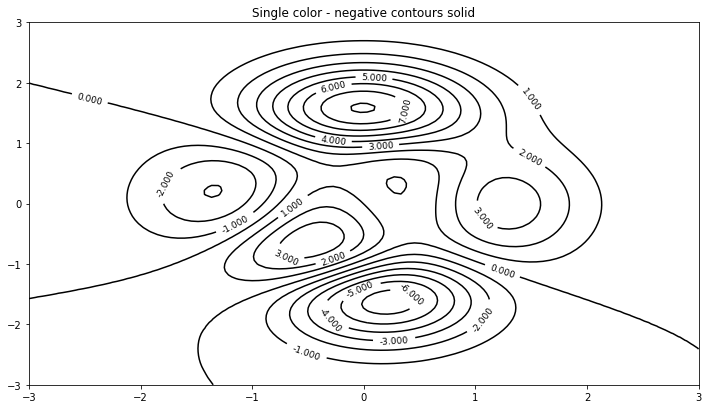

In [54]:
levels = np.arange(-8, 10, 1)
plt.rcParams['contour.negative_linestyle'] = 'solid'
ax = plt.axes()
cs = ax.contour(xx, yy, z, 10, colors='k', levels=levels)
ax.clabel(cs, fontsize=9, inline=1)
ax.set_title('Single color - negative contours solid')
plt.show()

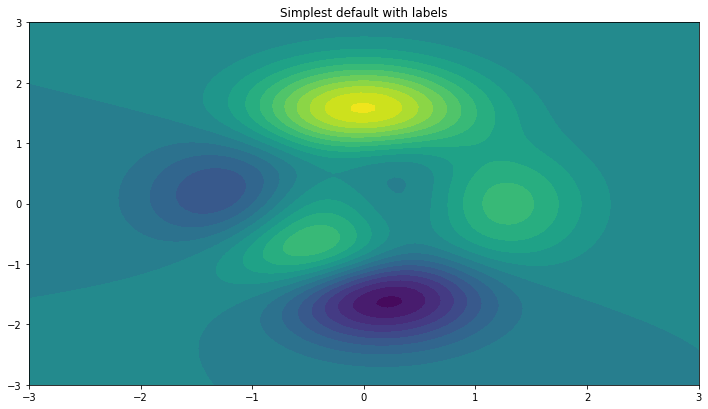

In [67]:
ax = plt.axes()
cs = plt.contourf(x, y, z, levels=20, corner_mask=True)
ax.set_title('Simplest default with labels')

plt.show()

similarly, we can also plot contous in 3D

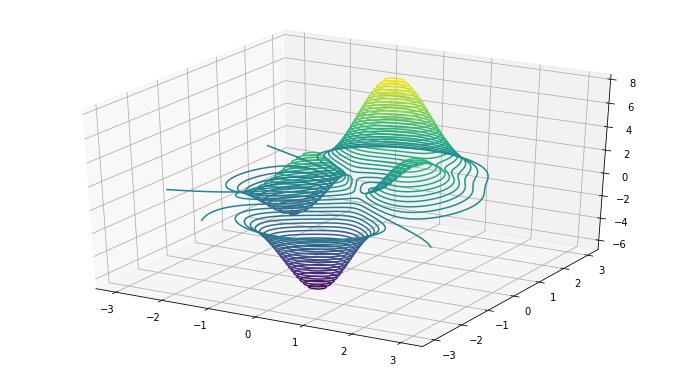

In [15]:
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
plt.show()

here is an example for a random 3d bar plot 

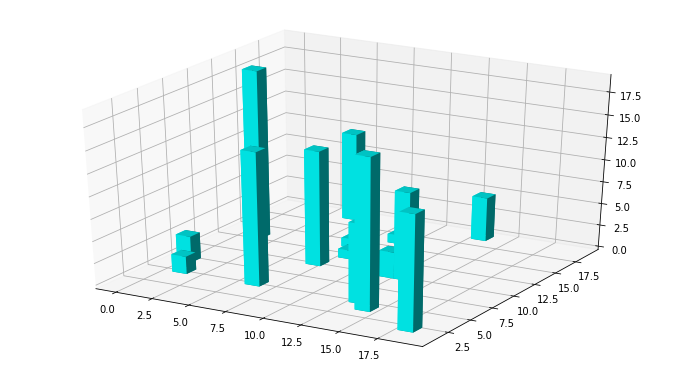

In [13]:
fig = plt.figure()
ax = plt.axes(projection="3d")

num_bars = 15
x_pos = np.random.randint(0, 20, num_bars)
y_pos = np.random.randint(0, 20, num_bars)
z_pos = np.zeros(num_bars)
x_size = np.ones(num_bars)
y_size = np.ones(num_bars)
z_size = np.random.randint(0, 20, num_bars)

ax.bar3d(x_pos, y_pos, z_pos, x_size, y_size, z_size, color='aqua')
plt.show()

---
## **2-D interpolation**

The file *ocean.npy* contains an a two-dimensional array that describes measurements of the ocean depth.

In [16]:
x = np.arange(0, 4.5, 0.5) # x-axis (varies across the rows of z)
y = np.arange(0, 6.5, 0.5) # y-axis (varies down the columns of z)
z = np.load("files/ocean.npy")
xx, yy = np.meshgrid(x, y)

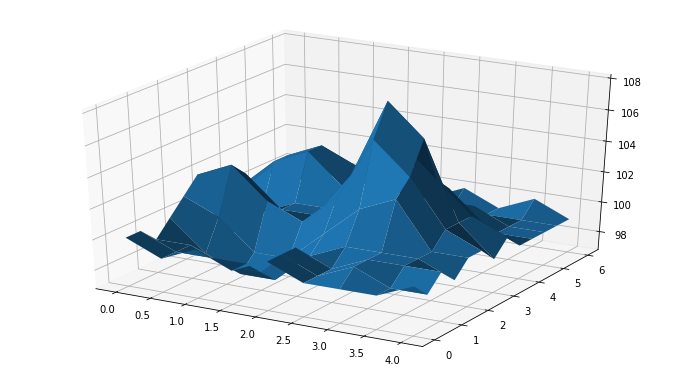

In [17]:
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, z)
plt.show()

We can use the interp2 function to interpolate to intermediate
values of x and y.

In [29]:
from scipy.interpolate import interp2d
f_z = interp2d(x, y, z)
f_z(2.2, 3.3)

array([103.92])

Similar tp `interp1d` we can interpolate in several methods. Linear interpolation is the default. 
*spline* polynomial interpolation

In [30]:
f_z_cubic = interp2d(x, y, z, kind='cubic')
f_z_cubic(2.2, 3.3)

array([104.30155516])

*nearest neighbor* interpolation

Let's produce the function in a finer grid
using spline interpolation.

In [34]:
xi = np.linspace(0, 4, 30)
yi = np.linspace(0, 6, 40)
xxi, yyi = np.meshgrid(xi, yi)
zzi = f_z_cubic(xi, yi)

Let's plot the resulting function 

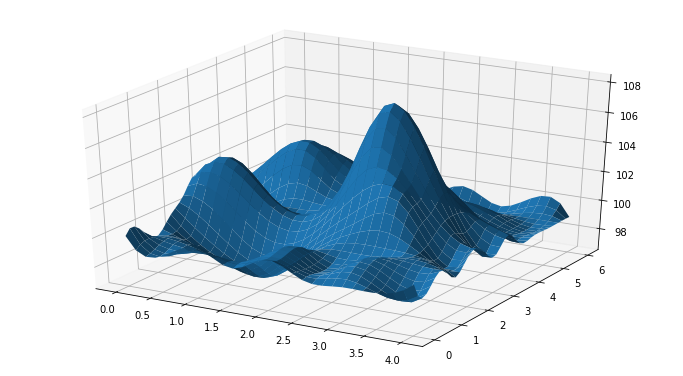

In [36]:
ax = plt.axes(projection='3d')
ax.plot_surface(xxi, yyi, zzi)
plt.show()

It's interesting to plot (with red circles)
the original values and see how the interpolation
goes through them

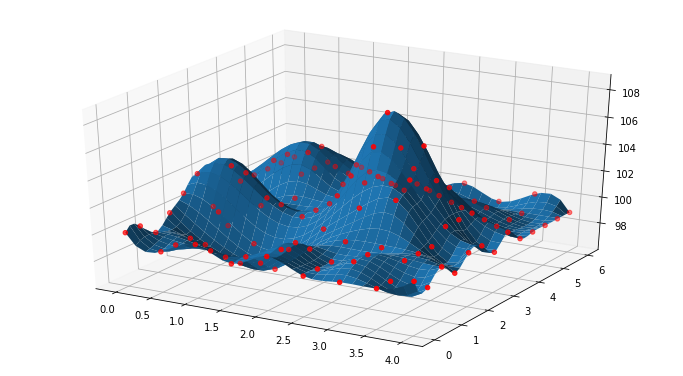

In [40]:
ax = plt.axes(projection='3d')
ax.plot_surface(xxi, yyi, zzi)
ax.scatter(xx, yy, z, c='r')
plt.show()